<a href="https://colab.research.google.com/github/PDCaire10/USIL_Capstone_202202_G10_PNN_Bagging/blob/main/Modelo_PNN%2BBagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configuracion y librerias**

---



In [3]:
! git clone https://github.com/PDCaire10/USIL_Capstone_202202_G10_PNN_Bagging.git

fatal: destination path 'USIL_Capstone_202202_G10_PNN_Bagging' already exists and is not an empty directory.


In [2]:
import pandas as pd

#Libreriras para graficos
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms #Librería muy útil para ver los valores nulos
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [4]:
datos = pd.read_csv("/content/USIL_Capstone_202202_G10_PNN_Bagging/cs-data.csv")

**Ver información y estadísticas descriptivas**

---



In [76]:
#primeras 5 filas del dataset
datos.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [72]:
col_names = datos.columns

col_names

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [73]:
datos.shape

(150000, 11)

In [74]:
datos.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [89]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

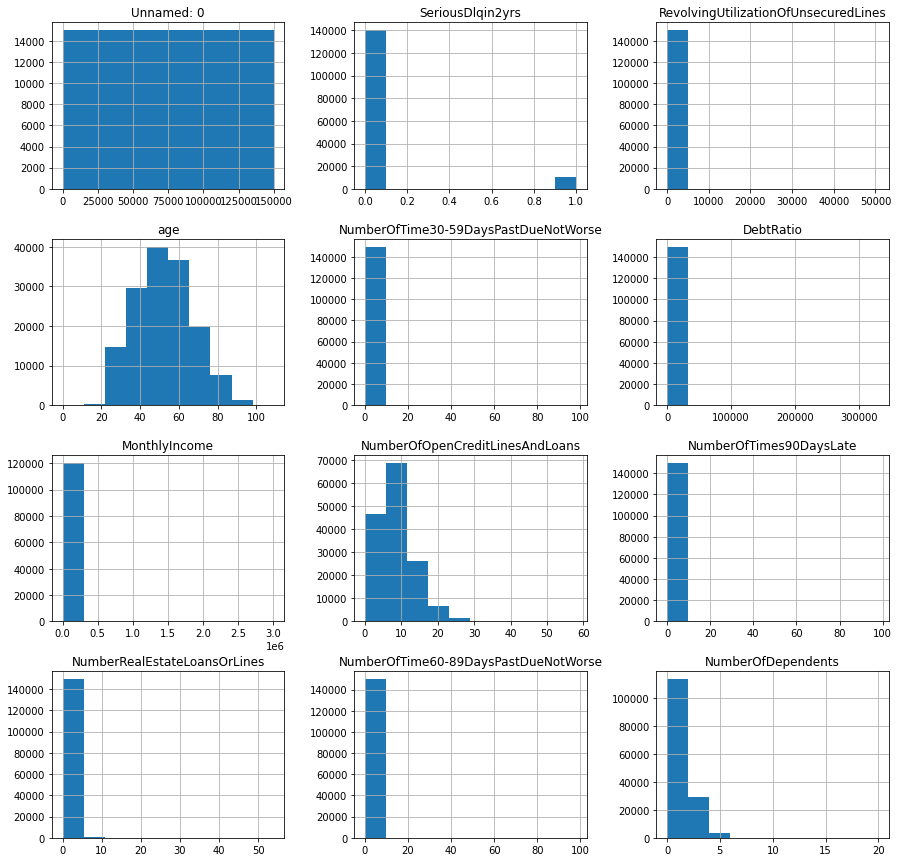

In [5]:
datos.hist(figsize=[15,15]);

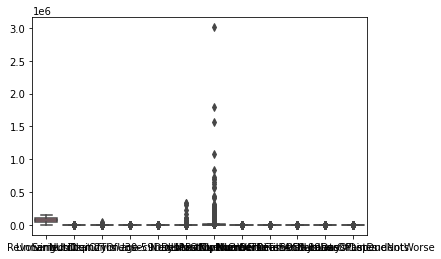

In [30]:
sns.boxplot(data=datos);

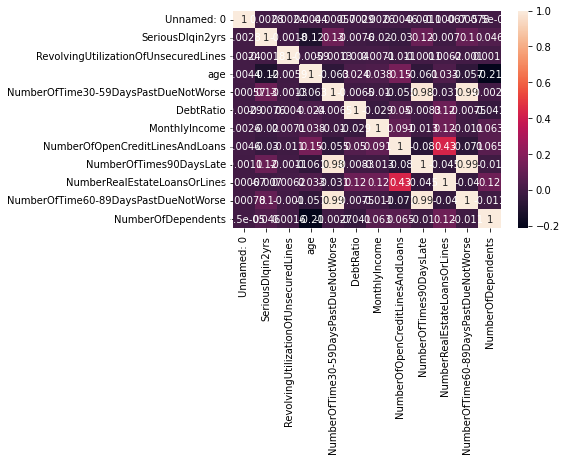

In [31]:
sns.heatmap(datos.corr(), annot=True);

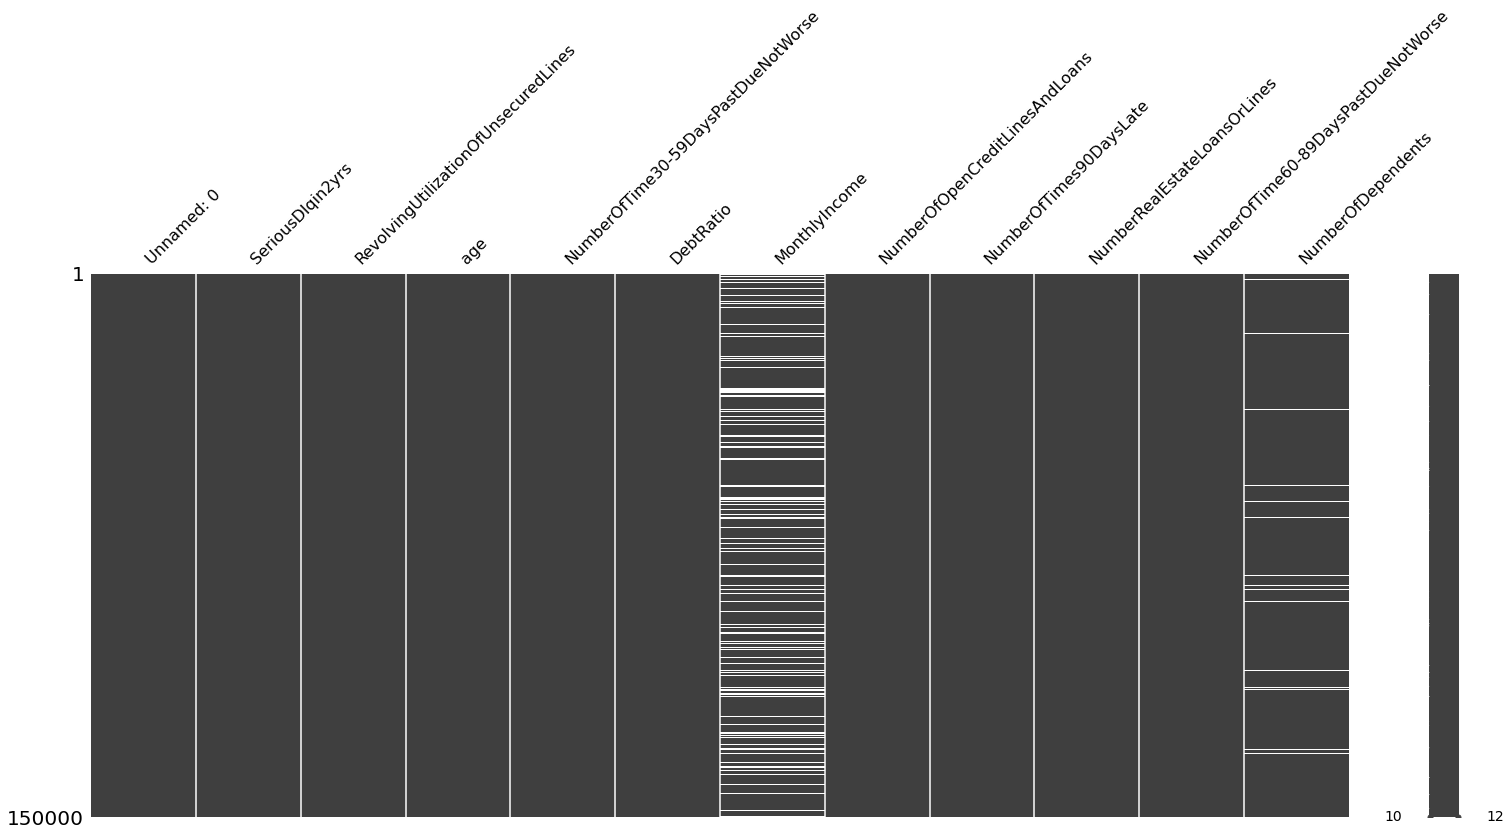

In [32]:
ms.matrix(datos)

**Limpieza de datos**

---



In [33]:
#datos=datos.drop(["Unnamed: 0"], axis=1)
datos.drop("Unnamed: 0", axis=1, inplace=True)

In [34]:
datos.isnull().values.any()

True

In [35]:
datos.isnull().any()

SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [36]:
# check for missing values in variables
datos.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [37]:
#datos.isnull().sum().sum()

In [ ]:
datos['NumberOfTime30-59DaysPastDueNotWorse']>90

0         False
1         False
2         False
3         False
4         False
          ...  
251498    False
251499    False
251500    False
251501    False
251502    False
Name: NumberOfTime30-59DaysPastDueNotWorse, Length: 251503, dtype: bool

In [ ]:
nan_rows = datos[datos.isnull().any(1)]
nan_rows

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0.0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0.0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
16,0.0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
32,0.0,0.083418,62,0,977.000000,NaN,6,0,1,0,0.0
41,0.0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
251498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
251499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
251500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
251501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [ ]:
datos.columns[datos.isnull().any()]

Index(['SeriousDlqin2yrs', 'MonthlyIncome', 'NumberOfDependents'], dtype='object')

In [ ]:
datos.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    208075
age                                         88
NumberOfTime30-59DaysPastDueNotWorse        17
DebtRatio                               182595
MonthlyIncome                            15757
NumberOfOpenCreditLinesAndLoans             60
NumberOfTimes90DaysLate                     21
NumberRealEstateLoansOrLines                29
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          14
dtype: int64